# ORIE 4580/5580 Assignment 6

#### Students: Maddi Klancher (mrk256) and Sofia Paredes (smp343)

### Github link: [example Github link](https://github.com/)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

In [57]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.

$P[\text{Coffee store arrivals} \ge \text{250 customers in a one 12 hour day}]$

Mean: $ E[\text{# of customers over 12 hours}]$ $ = \int_{0}^{12}\lambda (t)dt = \int_{0}^{12}\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) = 240$

$ E[\text{# of customers over 12 hours}] = 240$

$P(N(t)=k)=\frac{e^{-\lambda t}(\lambda t)^k}{k!}$

$P(N(t) \ge 250) = 1 - P(N(t) \le 250) = 1 - CDF(250)$

$P(N(t) \le k) = CDF(k) = \Sigma_{i=0}^{k}[\frac{e^{-\lambda t}(\lambda t)^i}{i!}]$

$P(N(t) \le 250) = CDF(250) = \Sigma_{i=0}^{250}[\frac{e^{-\lambda t}(\lambda t)^i}{i!}]$


$ \lambda(t)'=\frac{1}{56}\left(15t^2-180t+300\right) \quad \text{for } 0 \leq t \leq 12$

Maximum $\lambda^*$ at $ \lambda(t)' = 0 $ where $t* = 2$ and $\lambda^* = 31.429$

In [130]:
import scipy.stats as stats

mu = 240
cdf_250 = stats.poisson.cdf(250,mu)
prob = 1-cdf_250

print("Probability: ", prob)

Probability:  0.24711253205956696


___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



In [119]:
import numpy as np
from scipy.stats import poisson, norm

n=500
max_time = 12
max_lambda = 31.429
arrivals = []
count = []

def lambda_t(t):
    return (1/56) * (5 * t**3 - 90 * t**2 + 300 * t + 1480)

for i in range(500):
    T = []
    t = 0

    while t<max_time:
        A = np.random.exponential(1/max_lambda)
        t += A
        u = np.random.uniform(0,1)
        prob = (lambda_t(t)/max_lambda)
        if(u<=prob):
            T.append(t)
            
    if len(T) >= 250:
        count.append(1)
    else:
        count.append(0)
    

mean_prob = np.mean(count)
std_error = np.std(count, ddof=1)/np.sqrt(n)

z = norm.ppf(0.975)
CI = (mean_prob-z*std_error,mean_prob+z*std_error)

print("Probability of more than 250 customers: ", mean_prob)
print("95% confidence interval: ", CI)


Probability of more than 250 customers:  0.258
95% confidence interval:  (0.21961075032541066, 0.29638924967458935)


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

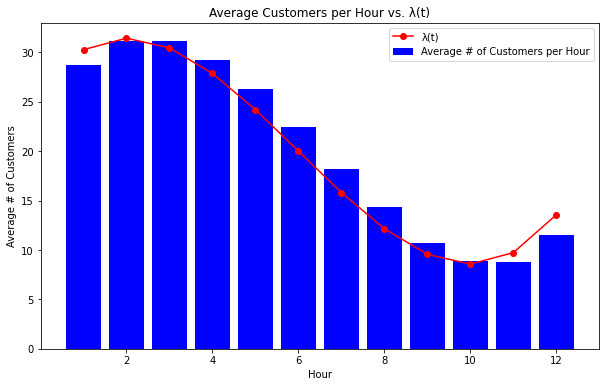

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n=500
max_time = 12
hours = list(range(1,max_time+1))
average_arrivals = [0] * max_time

def lambda_t(t):
    return (1/56) * (5 * t**3 - 90 * t**2 + 300 * t + 1480)

for i in range(n):
    count_per_hour = np.zeros(max_time)
    for hour in range(max_time):
        t_1 = hour
        t_2 = hour + 1
        x = np.random.uniform(t_1,t_2)
        y = lambda_t(x)
        num_arrivals = np.random.poisson(y)
        count_per_hour[hour] = num_arrivals
    average_arrivals = np.add(average_arrivals,count_per_hour)
    
average_arrivals /= 500

# bar plot
plt.figure(figsize=(10,6))
plt.bar(hours, average_arrivals, color='blue', label="Average # of Customers per Hour")
plt.plot(hours, [lambda_t(t) for t in hours], color='red', marker = 'o', linestyle='-', label='λ(t)')
plt.xlabel("Hour")
plt.ylabel("Average # of Customers")
plt.title("Average Customers per Hour vs. λ(t)")
plt.legend()
plt.show()




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


In [58]:
def check_songs(n):
    songs = np.arange(1, n + 1)
    counters = []
    
    for i in range(1000): 
        counter = 0 
        song_dict = {}
        while len(song_dict) < n:
            rand_song = rand.choice(songs)
            if rand_song not in song_dict:
                song_dict[rand_song] = 1
            counter += 1
        counters.append(counter)
        
    return counters

For n = 10 the average number of songs to play all songs is: 29.25
95% CI: [26.99, 31.51]


For n = 20 the average number of songs to play all songs is: 71.58
95% CI: [66.97, 76.19]


For n = 30 the average number of songs to play all songs is: 119.34
95% CI: [111.94, 126.74]


For n = 40 the average number of songs to play all songs is: 172.84
95% CI: [162.99, 182.69]


For n = 50 the average number of songs to play all songs is: 227.12
95% CI: [214.47, 239.77]


For n = 100 the average number of songs to play all songs is: 518.89
95% CI: [494.34, 543.44]


For n = 200 the average number of songs to play all songs is: 1176.16
95% CI: [1126.98, 1225.34]


For n = 250 the average number of songs to play all songs is: 1524.19
95% CI: [1464.22, 1584.16]


For n = 500 the average number of songs to play all songs is: 3419.26
95% CI: [3293.77, 3544.75]




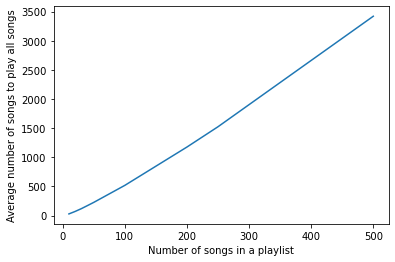

In [59]:
values = [10, 20, 30, 40, 50, 100, 200, 250, 500]
means = []
for value in values:
    result = check_songs(value)
    mean = round(np.mean(result), 2)
    means.append(mean)
    std = round(np.std(result), 2)
    halfwidth = 1.96 * std / (np.sqrt(100))
    ci = [round(mean - halfwidth, 2), round(mean + halfwidth, 2)]
    print('For n = ' + str(value) + ' the average number of songs to play all songs is: ' + str(mean)) 
    print('95% CI: ' + str(ci))
    print('\n')

plt.plot(values, means)
plt.xlabel('Number of songs in a playlist')
plt.ylabel('Average number of songs to play all songs')
plt.show()

Text(0, 0.5, 'Average Amount of Songs to Play All')

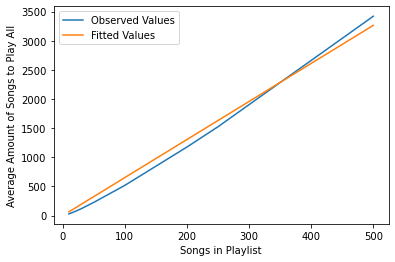

In [60]:
x = values
y = means
model = sm.OLS(y, x)
results = model.fit()
y_pred = results.predict(x)

plt.plot(x, y, label = 'Observed Values')
plt.plot(x, y_pred, label = 'Fitted Values')
plt.legend()
plt.xlabel('Songs in Playlist')
plt.ylabel('Average Amount of Songs to Play All')


In [61]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1270.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                    4.21e-10
Time:                        19:48:43   Log-Likelihood:                         -54.632
No. Observations:                   9   AIC:                                      111.3
Df Residuals:                       8   BIC:                                      111.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/maddiklancher/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



In [62]:
def check_first(n):
    songs = np.arange(1, n + 1)
    counters = []
    
    for i in range(1000):
        song_dict = {}
        counter = 0 
        while len(song_dict) < n:
            rand_song = np.random.choice(songs)
            if rand_song not in song_dict:
                song_dict[rand_song] = 1
                counter += 1
            else:
                break 
        counters.append(counter)
    
    
    return counters 

For n = 10 the average number of songs to play all songs is: 3.64
95% CI: [3.3, 3.98]


For n = 20 the average number of songs to play all songs is: 5.17
95% CI: [4.68, 5.66]


For n = 30 the average number of songs to play all songs is: 6.47
95% CI: [5.85, 7.09]


For n = 40 the average number of songs to play all songs is: 7.86
95% CI: [7.11, 8.61]


For n = 50 the average number of songs to play all songs is: 8.6
95% CI: [7.76, 9.44]


For n = 100 the average number of songs to play all songs is: 12.48
95% CI: [11.29, 13.67]


For n = 200 the average number of songs to play all songs is: 17.69
95% CI: [15.98, 19.4]


For n = 250 the average number of songs to play all songs is: 19.42
95% CI: [17.41, 21.43]


For n = 500 the average number of songs to play all songs is: 27.81
95% CI: [24.96, 30.66]




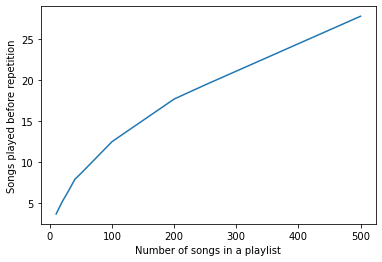

In [63]:
values = [10, 20, 30, 40, 50, 100, 200, 250, 500]
means = []
for value in values:
    result = check_first(value)
    mean = round(np.mean(result), 2)
    means.append(mean)
    std = round(np.std(result), 2)
    halfwidth = 1.96 * std / (np.sqrt(100))
    ci = [round(mean - halfwidth, 2), round(mean + halfwidth, 2)]
    print('For n = ' + str(value) + ' the average number of songs to play all songs is: ' + str(mean)) 
    print('95% CI: ' + str(ci))
    print('\n')

plt.plot(values, means)
plt.xlabel('Number of songs in a playlist')
plt.ylabel('Songs played before repetition')
plt.show()

___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

In [64]:
last = []
n = 20
songs = np.arange(0, n - 1)
finals = []


for i in range(10000):
    song_dict = {0:1}
    song_index = 0 
    
    while len(song_dict) < n:
        pick = np.random.choice(2)
        if pick == 0:
            song_index = (song_index + 1) % n 
        else:
            song_index = (song_index - 1) % n
            
        if song_index not in song_dict:
            song_dict[song_index] = 1
    finals.append(song_index + 1)
    

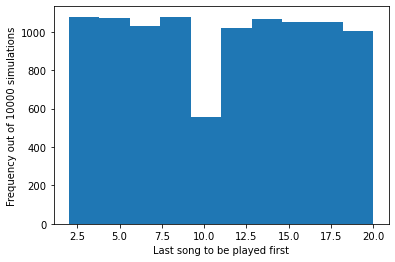

In [65]:
plt.hist(finals)
plt.xlabel('Last song to be played first')
plt.ylabel('Frequency out of 10000 simulations')
plt.show()

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

In [66]:
def find_probA(startA, startB):
    
    a_wins = 0 
    
    for i in range(10000):
        a = startA
        b = startB
        while a > 0 and b > 0:
            pick = np.random.choice(['a','b'])
            if pick == 'a':
                a += 1
                b -= 1
            else:
                a -= 1
                b += 1
        if b == 0:
            a_wins += 1
    
    return a_wins/10000

In [67]:
pa10 = round(find_probA(10, 10), 4)
print('Probability that A wins when starting values of a and b are 10: ' + str(pa10))
print('Probability that B wins when starting values of a and b are 10: ' + str(1 - pa10))

Probability that A wins when starting values of a and b are 10: 0.4921
Probability that B wins when starting values of a and b are 10: 0.5079


In [68]:
pa15 = round(find_probA(10, 15), 4)
print('Probability that A wins when starting values of a and b are 10 and 15: ' + str(pa15))
print('Probability that B wins when starting values of a and b are 10 and 15: ' + str(1 - pa15))

Probability that A wins when starting values of a and b are 10 and 15: 0.3951
Probability that B wins when starting values of a and b are 10 and 15: 0.6049


In [69]:
pa20 = round(find_probA(10, 20), 4)
print('Probability that A wins when starting values of a and b are 10 and 20: ' + str(pa20))
print('Probability that B wins when starting values of a and b are 10 and 20: ' + str(1 - pa20))

Probability that A wins when starting values of a and b are 10 and 20: 0.3308
Probability that B wins when starting values of a and b are 10 and 20: 0.6692


### Analytical Approach

Let's call $p_{a}$ the probability that player A wins given that they start with $a$ dollars and player B starts with $b$ dollars.

Recursively: $p_{a} = \frac{1}{2} * p_{a-1} + \frac{1}{2} * p_{a+1}$

Since it is impossible for A to lose money if they start with $0$ dollars, the boundary conditions is that $p_{0} = 0$

$p_{1} = \frac{1}{2} * 0 + \frac{1}{2} * p_{2} = \frac{p_{2}}{2}$

$p_{2} = \frac{2}{3} * p_{3}$

$p_{3} = \frac{3}{4} * p_{4}$

This derivation can be simplied to $p_{a} = \frac{b}{a+b}$

When $a = b$, $p_{a} = p_{b} = \frac{1}{2}$, which follows the simulation above. 

___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

In [70]:
def gametime(startA, startB):
    counters = []
    
    for i in range(1000):
        a = startA 
        b = startB
        counter = 0 
        while a > 0 and b > 0:
            counter += 1
            pick = np.random.choice(['a','b'])
            if pick == 'a':
                a += 1
                b -= 1
            else:
                a -= 1 
                b += 1
        counters.append(counter)
    
    result = np.mean(counters)
        
    return result

In [71]:
a_values = np.arange(1, 11)
b_values = np.arange(11, 21)
times = np.zeros((len(b_values), len(a_values)))

for i, b in enumerate(b_values):
    for j, a in enumerate(a_values):
        times[i,j] = gametime(a, b)

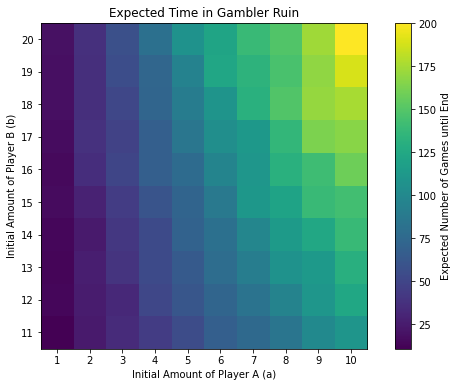

In [72]:
plt.figure(figsize=(10, 6))
plt.imshow(times, origin='lower')
plt.colorbar(label='Expected Number of Games until End')
plt.xlabel('Initial Amount of Player A (a)')
plt.ylabel('Initial Amount of Player B (b)')
plt.title('Expected Time in Gambler Ruin')
plt.xticks(np.arange(len(a_values)), a_values)
plt.yticks(np.arange(len(b_values)), b_values)
plt.show()

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [77]:
import numpy as np
import pandas as pd

n = 100
num_friends = []

for i in range(n):
    t_0 = np.random.exponential(2)
    count = 0
    test = False
    
    while test == False:
        t_i = np.random.exponential(2)
        count+=1
        
        if t_i > t_0:
            test = True
    
    num_friends.append(count)

mean_friends = np.mean(num_friends)
std_error = np.std(num_friends, ddof=1)/np.sqrt(n)

z = norm.ppf(0.975)
CI = (mean_friends-z*std_error,mean_friends+z*std_error)

print("Expected number of friends needed to survey: ", mean_friends)
print("95% confidence interval: ", CI)

Expected number of friends needed to survey:  31.07
95% confidence interval:  (-20.2840127664317, 82.4240127664317)


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


In [73]:
n_sim = [100, 500, 1000, 1500, 2000, 2500, 3000, 
        3500, 4000, 4500, 5000, 5500, 6000, 6500, 
        7000, 7500, 8000, 8500, 9000, 9500, 10000]

[6.39, 14.976, 5.645, 11.694666666666667, 7.87, 17.6048, 7.841333333333333, 6.8348571428571425, 7.5805, 11.972888888888889, 7.0586, 6.622909090909091, 10.171333333333333, 8.484923076923076, 9.837571428571428, 10.035866666666667, 11.557625, 7.967294117647059, 9.655888888888889, 11.909263157894737, 9.9387]


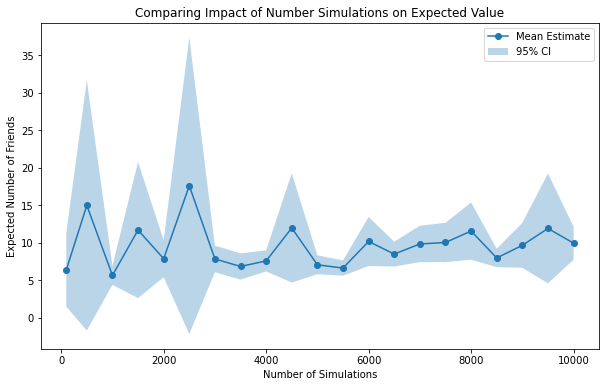

In [83]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# testing

means=[]
CI_lower_bounds = []
CI_upper_bounds = []
y_errors = []

for j in n_sim:
    
    num_friends = []
    
    for i in range(j):
        
        t_0 = np.random.exponential(2)
        count = 0
        test = False

        while test == False:
            t_i = np.random.exponential(2)

            count+=1
            if t_i > t_0:
                test = True;

        num_friends.append(count)

    mean_friends = np.mean(num_friends)
    std_error = np.std(num_friends, ddof=1)/np.sqrt(j)

    z = norm.ppf(0.975)
    CI_lower = mean_friends-z*std_error
    CI_upper = mean_friends+z*std_error

    
    means.append(mean_friends)
    CI_lower_bounds.append(CI_lower)
    CI_upper_bounds.append(CI_upper)
    
print(means)

plt.figure(figsize=(10,6))
plt.plot(n_sim,means, marker='o', label='Mean Estimate')
plt.fill_between(n_sim, CI_lower_bounds, CI_upper_bounds, alpha=0.3, label='95% CI')
plt.xlabel("Number of Simulations")
plt.ylabel("Expected Number of Friends")
plt.title("Comparing Impact of Number Simulations on Expected Value")
plt.legend()
plt.show()

___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans.

Create an indicator variable: $X_i$

$X_i = 1$ if the i-th friend takes longer than you
$X_i = 0$ if the i-th friend does NOT take longer than you

Due to linearity of expectation:

$ E[\text{# of queries}] = 1*E[X_1] + 2*E[X_2] + 3*E[X_3] + ... + i*E[X_i]$

$P(X_i=1) = P[T_i>T_0 and T_i <= T_0 for all j<i]$

$𝑇_𝑖∼𝐸𝑥𝑝(0.5)$, so $P(T_0 >= T_i) = \frac{1}{2}$ for any i

Therefore, $P(T_0 >= T_j) = \frac{1}{i+1}$ for all $j<i$

Thus, $P(T_0 >= T_j \text{ and } T_0 < T_i) = \frac{1}{i} - \frac{1}{i+1}$

$ E[\text{# of queries}=i] = i*(\frac{1}{i} - \frac{1}{i+1})$

$= 1 - \frac{1}{i+1}$

This is a divergent series. Therefore, the expected number of queries until you find someone who takes longer than you is infinite. Therefore, you would have to survey an infinite number of friends 
